In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
from os.path import join

In [2]:
def custom_plots(ax=None):
    if ax is None:
        ax = plt.gca()
    ax.grid(False)
    ax.spines["bottom"].set_color("black")
    ax.spines["left"].set_color("black")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.gca().yaxis.set_ticks_position('left')
    plt.gca().xaxis.set_ticks_position('bottom')

In [ ]:
src = "../data/"
dst = "./engagement/"

with open(join(src, "dtypes_config.pickle"), "rb") as file:
    DTYPES = pkl.load(file)

df = pd.read_csv(join(src,
                      "matched_starters_mahalanobis.csv"),
                 usecols=["Rating", "like_count",
                            "reply_count", "retweet_count", "quote_count"
                          ],
                          dtype=DTYPES)

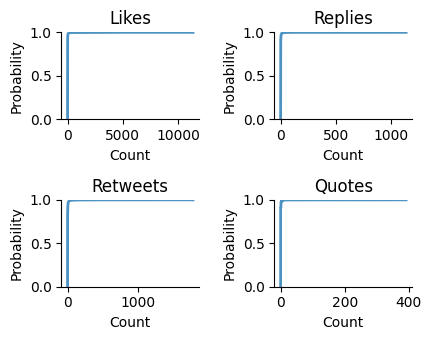

In [6]:
data1 = df['like_count'].values
label1 = "Likes"

data2 = df['reply_count'].values
label2 = "Replies"

data3 = df['retweet_count'].values
label3 = "Retweets"

data4 = df['quote_count'].values
label4 = "Quotes"


fig, axes = plt.subplots(2, 2, figsize=(4.5,3.5))

datasets = [data1, data2, data3, data4]
labels = [label1, label2, label3, label4]

for i, (data, label) in enumerate(zip(datasets, labels)):
    row, col = i // 2, i % 2
    ax = axes[row, col]
    
    sorted_data = np.sort(data)
    y_values = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    
    ax.plot(sorted_data, y_values, linewidth=2, alpha=0.8)
    ax.set_title(f'{label}')
    ax.set_xlabel('Count')
    ax.set_ylabel('Probability')
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1)
    custom_plots(ax)

plt.tight_layout()
plt.savefig(join(dst, "engagement_cdf.pdf"), dpi=300)
plt.show()